In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import gmaps

# Import API key
from api_keys import g_key

In [2]:
#Recuperamos el Archivo original
csv_path = "Carpetas2018.csv"
carpetas2018= pd.read_csv(csv_path,encoding="latin-1")
carpetas2018.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,...,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint,conducta,hora
0,0,0,21453,2018.0,Septiembre,2018-09-30 23:10:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÃÂÃÂN EN BENITO JUÃÂÃÂREZ,BJ-1,...,2018,Diciembre,2018-12-01 00:00,PENSILVANIA,NaN,-99.176638,19.385574,"19.3855741511,-99.1766377348",ROBO,23
1,1,1,21454,2018.0,Octubre,2018-10-26 12:00:00,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,INVESTIGACIÃÂÃÂN EN MIGUEL HIDALGO,MH-1,...,2018,Diciembre,2018-12-01 00:19,LAGO ZIRAHUEN,NaN,-99.173020,19.444202,"19.4442020012,-99.1730199414",ENGAÃÂO,12
2,2,2,21455,2018.0,Agosto,2018-08-17 07:00:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÃÂÃÂN EN MIGUEL HIDALGO,MH-4,...,2018,Diciembre,2018-12-01 00:37,MARTIRES DE TACUBAYA,NaN,-99.183591,19.397132,"19.3971318825,-99.1835911348",ENGAÃÂO,7
3,3,3,21456,2018.0,Octubre,2018-10-30 07:15:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÃÂÃÂN EN IZTAPALAPA,IZP-4,...,2018,Diciembre,2018-12-01 00:45,CALZADA DE LA VIGA,NaN,-99.122577,19.372043,"19.3720428325,-99.1225767038",ROBO,7
4,4,4,21457,2018.0,Noviembre,2018-11-30 13:00:00,ROBO A CASA HABITACION SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÃÂÃÂN EN MIGUEL HIDALGO,MH-1,...,2018,Diciembre,2018-12-01 00:46,LAGO ARGENTINA,NaN,-99.200325,19.456944,"19.4569436872,-99.2003248624",ROBO,13


In [3]:
# Agrícola Oriental
Iztacalco=carpetas2018.loc[carpetas2018["alcaldia_hechos"] =="IZTACALCO", :]
AO=Iztacalco.loc[Iztacalco["colonia_hechos"] =="AGRÃÂÃÂCOLA ORIENTAL", :]
violencia_AO=AO.loc[AO["conducta"] =="VIOLENCIA", :]

In [4]:
# Polanco
MH=carpetas2018.loc[carpetas2018["alcaldia_hechos"] =="MIGUEL HIDALGO", :]
Polanco=MH.loc[MH["colonia_hechos"] =="POLANCO", :]
violencia_POLANCO=Polanco.loc[Polanco["conducta"] =="VIOLENCIA", :]

In [5]:
# Store latitude and longitude in locations
locations =violencia_POLANCO[["latitud", "longitud"]]
locations1 =violencia_AO[["latitud", "longitud"]]
# Fill NaN values and convert to float
rating = 1

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations)
heat_layer1 = gmaps.heatmap_layer(locations1)
# Add layer
fig.add_layer(heat_layer)
fig.add_layer(heat_layer1)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [25]:
# Store latitude and longitude in locations
locations =violencia_AO[["latitud", "longitud"]]

# Fill NaN values and convert to float
rating = 1

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations)
# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [4]:
#Recuperamos el Archivo original
csv_path = "economic_units.csv"
poblacion= pd.read_csv(csv_path,encoding="latin-1")
poblacion.head()

#Recuperamos el Archivo original
csv_path = "Carpetas2018.csv"
carpetas2018= pd.read_csv(csv_path,encoding="latin-1")
carpetas2018.head()

,Unnamed: 0,Unnamed: 0.1,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,...,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint,conducta,hora
0,0,21453,2018.0,Septiembre,2018-09-30 23:10:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÃÂÃÂN EN BENITO JUÃÂÃÂREZ,BJ-1,UI-1SD,...,2018,Diciembre,2018-12-01 00:00,PENSILVANIA,NaN,-99.176638,19.385574,"19.3855741511,-99.1766377348",ROBO,23
1,1,21454,2018.0,Octubre,2018-10-26 12:00:00,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,INVESTIGACIÃÂÃÂN EN MIGUEL HIDALGO,MH-1,UI-1SD,...,2018,Diciembre,2018-12-01 00:19,LAGO ZIRAHUEN,NaN,-99.173020,19.444202,"19.4442020012,-99.1730199414",ENGAÃÂO,12
2,2,21455,2018.0,Agosto,2018-08-17 07:00:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÃÂÃÂN EN MIGUEL HIDALGO,MH-4,UI-2SD,...,2018,Diciembre,2018-12-01 00:37,MARTIRES DE TACUBAYA,NaN,-99.183591,19.397132,"19.3971318825,-99.1835911348",ENGAÃÂO,7
3,3,21456,2018.0,Octubre,2018-10-30 07:15:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÃÂÃÂN EN IZTAPALAPA,IZP-4,UI-2SD,...,2018,Diciembre,2018-12-01 00:45,CALZADA DE LA VIGA,NaN,-99.122577,19.372043,"19.3720428325,-99.1225767038",ROBO,7
4,4,21457,2018.0,Noviembre,2018-11-30 13:00:00,ROBO A CASA HABITACION SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÃÂÃÂN EN MIGUEL HIDALGO,MH-1,UI-1SD,...,2018,Diciembre,2018-12-01 00:46,LAGO ARGENTINA,NaN,-99.200325,19.456944,"19.4569436872,-99.2003248624",ROBO,13


In [6]:
cp=poblacion["cod_postal"].value_counts()
cp1= pd.DataFrame(cp).reset_index()
cp1=cp1.rename(columns={"index":"cp","cod_postal":"empresas"})
cp1.head()

,cp,empresas
0,6010.0,1582
1,6700.0,1513
2,3100.0,1348
3,6600.0,1077
4,11000.0,1032


In [7]:
#Recuperamos el Archivo original
csv_path = "codigos-postales-colonia.csv"
CP= pd.read_csv(csv_path,encoding="latin-1")
CP=CP[["d_codigo","d_asenta","D_mnpio"]]
CP=CP.rename(columns={"d_codigo":"cp","d_asenta":"colonia"})
CP

,cp,colonia,D_mnpio
0,6000,CENTRO,CUAUHTEMOC
1,6010,CENTRO,CUAUHTEMOC
2,6020,CENTRO,CUAUHTEMOC
3,6040,CENTRO,CUAUHTEMOC
4,6050,CENTRO,CUAUHTEMOC
...,...,...,...
67,11540,POLANCO,MIGUEL HIDALGO
68,11550,POLANCO,MIGUEL HIDALGO
69,11560,POLANCO,MIGUEL HIDALGO
70,16500,SANTA CRUZ ACALPIXCA,XOCHIMILCO


In [8]:
# Merge the two DataFrames together based on the Dates they share
empresasxcp = pd.merge(CP, cp1, on="cp")
empresasxcp["union"]=(empresasxcp["D_mnpio"]+empresasxcp["colonia"])
empresasxcolonia=empresasxcp.groupby(["union"]).sum()["empresas"].rename("empresas")

empresasxcolonia= pd.DataFrame(empresasxcolonia).reset_index()
empresasxcolonia

,union,empresas
0,BENITO JUAREZDEL VALLE CENTRO,1348
1,BENITO JUAREZNARVARTE,867
2,BENITO JUAREZPORTALES SUR,269
3,COYOACANAJUSCO,216
4,COYOACANPEDREGAL DE SAN FRANCISCO,40
5,COYOACANPEDREGAL DE SANTA URSULA,189
6,COYOACANSAN FRANCISCO CULHUACAN,256
7,CUAUHTEMOCBUENAVISTA,254
8,CUAUHTEMOCCENTRO,3645
9,CUAUHTEMOCDOCTORES,563


In [9]:
carpetas2018["colonia_hechos"]= carpetas2018["colonia_hechos"].replace("AGRÃÂÃÂCOLA ORIENTAL", "AGRICOLA ORIENTAL")
carpetas2018["colonia_hechos"]= carpetas2018["colonia_hechos"].replace("AGRÃÂÃÂCOLA PANTITLAN", "AGRICOLA PANTITLAN")
carpetas2018["colonia_hechos"]= carpetas2018["colonia_hechos"].replace("SAN ANDRÃÂÃÂS TOTOLTEPEC", "SAN ANDRES TOTOLTEPEC")
carpetas2018["colonia_hechos"]= carpetas2018["colonia_hechos"].replace("MOCTEZUMA 2A SECCIÃÂÃÂN", "MOCTEZUMA 2A SECCION")
carpetas2018["colonia_hechos"]= carpetas2018["colonia_hechos"].replace("JUÃÂÃÂREZ", "JUAREZ")
carpetas2018["colonia_hechos"]= carpetas2018["colonia_hechos"].replace("JARDÃÂÃÂN BALBUENA", "JARDIN BALBUENA")
carpetas2018["colonia_hechos"]= carpetas2018["colonia_hechos"].replace("SAN FELIPE DE JESÃÂÃÂS", "SAN FELIPE DE JESUS")
carpetas2018["colonia_hechos"]= carpetas2018["colonia_hechos"].replace("GRANJAS MÃÂÃÂXICO", "GRANJAS MEXICO")
carpetas2018["colonia_hechos"]= carpetas2018["colonia_hechos"].replace("LEYES DE REFORMA 3A SECCIÃÂÃÂN", "LEYES DE REFORMA 3A SECCION")


In [11]:
violencia=carpetas2018.loc[carpetas2018["conducta"] =="VIOLENCIA", :]
porcolonia=violencia["colonia_hechos"].value_counts()
porcolonia.head(20)                     

CENTRO                       1302
DOCTORES                      626
AGRICOLA ORIENTAL             555
PEDREGAL DE SANTO DOMINGO     519
MORELOS                       481
GUERRERO                      445
DEL VALLE CENTRO              415
SANTA MARIA LA RIBERA         390
BUENAVISTA                    377
AGRICOLA PANTITLAN            364
SAN ANDRES TOTOLTEPEC         353
MOCTEZUMA 2A SECCION          339
ROMA NORTE                    337
NARVARTE                      319
OBRERA                        281
JUAREZ                        235
JARDIN BALBUENA               233
SAN MIGUEL TOPILEJO           231
PORTALES SUR                  230
AJUSCO                        220
Name: colonia_hechos, dtype: int64

In [106]:
# Agrícola Oriental
violencia=carpetas2018.loc[carpetas2018["conducta"] =="VIOLENCIA", :]
violencia1=violencia[{"alcaldia_hechos","colonia_hechos"}]
porcolonia=violencia["colonia_hechos"].value_counts()
porcolonia1= pd.DataFrame(porcolonia).reset_index()
porcolonia1=porcolonia1.rename(columns={"index":"Colonia","colonia_hechos":"Denuncias"})
porcolonia1.head()
len(porcolonia1)

1526

In [17]:
violencia=carpetas2018.loc[carpetas2018["conducta"] =="VIOLENCIA", :]

base=violencia.groupby(["alcaldia_hechos","colonia_hechos"]).count()["delito"].rename("Denuncias")

# Convert to DataFrame
DenunciasxAlcaldiaxcolonia = pd.DataFrame(base).reset_index()

# Preview DataFrame
DenunciasxAlcaldiaxcolonia.head(20)

DenunciasxAlcaldiaxcolonia.to_csv("vxcolonia.csv")

In [13]:
DXAXC=DenunciasxAlcaldiaxcolonia.sort_values(by="Denuncias",ascending=False)

In [14]:

DXAXC["union"]=(DXAXC["alcaldia_hechos"]+DXAXC["colonia_hechos"])
empresasxcolonia
porcolonia = pd.merge(empresasxcolonia,DXAXC, on="union")

In [15]:
porcolonia

,union,empresas,alcaldia_hechos,colonia_hechos,Denuncias
0,BENITO JUAREZDEL VALLE CENTRO,1348,BENITO JUAREZ,DEL VALLE CENTRO,415
1,BENITO JUAREZNARVARTE,867,BENITO JUAREZ,NARVARTE,319
2,BENITO JUAREZPORTALES SUR,269,BENITO JUAREZ,PORTALES SUR,230
3,COYOACANAJUSCO,216,COYOACAN,AJUSCO,220
4,COYOACANPEDREGAL DE SAN FRANCISCO,40,COYOACAN,PEDREGAL DE SAN FRANCISCO,1
5,COYOACANPEDREGAL DE SANTA URSULA,189,COYOACAN,PEDREGAL DE SANTA URSULA,208
6,COYOACANSAN FRANCISCO CULHUACAN,256,COYOACAN,SAN FRANCISCO CULHUACAN,145
7,CUAUHTEMOCBUENAVISTA,254,CUAUHTEMOC,BUENAVISTA,253
8,CUAUHTEMOCCENTRO,3645,CUAUHTEMOC,CENTRO,1302
9,CUAUHTEMOCDOCTORES,563,CUAUHTEMOC,DOCTORES,626


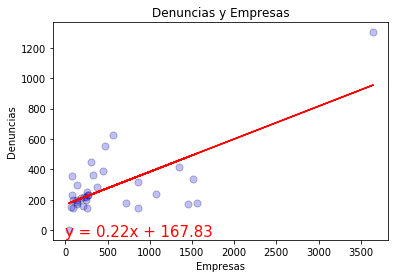

The r-squared is :0.6994747119855297


In [16]:
# regresion lineal de empresas vs violencia
x_values = porcolonia["empresas"]
y_values = porcolonia["Denuncias"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",s=50, alpha=0.25)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-40),fontsize=15,color="red")
plt.title("Denuncias y Empresas")
plt.xlabel("Empresas")
plt.ylabel("Denuncias")
plt.show()
print("The r-squared is :"+str(rvalue))
#print("Its look like there is a linear releation, the r is high and seems to be to mayor latitud the less temperture you has")
#plt.savefig("norte_tempvslat.png")

In [18]:
#Recuperamos el Archivo original
csv_path = "vypcolonia.csv"
vypcolonia= pd.read_csv(csv_path,engine="python")
vypcolonia.head()


,NO,alcaldia_hechos,colonia_hechos,Denuncias,poblacion,indice
0,468,COYOACAN,PEDREGAL DE SANTO DOMINGO,519,93364,5.558888
1,760,IZTACALCO,AGRICOLA ORIENTAL,555,83600,6.638756
2,848,IZTAPALAPA,DESARROLLO URBANO QUETZALCOATL,218,61837,3.525397
3,552,CUAUHTEMOC,CENTRO,1302,61229,21.264434
4,761,IZTACALCO,AGRICOLA PANTITLAN,364,60708,5.995915


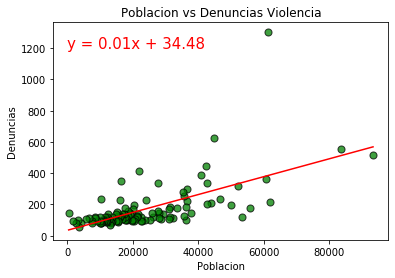

The r-squared is :0.6260874424804093


In [23]:
# Hemisferio Norte regresion lineal de Temp vs Latitud
x_values = vypcolonia["poblacion"]
y_values = vypcolonia["Denuncias"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="green", edgecolors="black",s=50, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,1200),fontsize=15,color="red")
plt.title("Poblacion vs Denuncias Violencia")
plt.xlabel("Poblacion")
plt.ylabel("Denuncias")
plt.show()
print("The r-squared is :"+str(rvalue))
#print("Its look like there is a linear releation, the r is high and seems to be to mayor latitud the less temperture you has")
#plt.savefig("norte_tempvslat.png")